# 🩺 Análisis de Indicadores de Salud Relacionados con la Diabetes

Este análisis utiliza datos del BRFSS 2015 para explorar la relación entre diversos factores de salud y la diabetes. El objetivo es identificar patrones y factores de riesgo mediante visualizaciones y análisis exploratorio de datos.


## 📦 Carga de librerías
Usamos pandas, numpy, matplotlib y seaborn para el análisis y visualización.


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


## 📁 Carga del dataset
Importamos el archivo CSV con los datos del BRFSS 2015.


In [61]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## 🔍 Exploración inicial del dataset
Revisamos información general, estadísticas descriptivas y valores nulos.


In [62]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Verificar valores faltantes




In [63]:
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# Verificar porcentaje de valores faltantes


In [64]:
missing_percentage = (missing_values / len(df)) * 100
print("Porcentaje de valores faltantes por columna:")
print(missing_percentage)

Porcentaje de valores faltantes por columna:
Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64


# Verificar duplicados y Eliminar duplicados



In [65]:
duplicates = df.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicates}")


df = df.drop_duplicates()

Cantidad de registros duplicados: 23899


# Verificar si hay edades negativas o mayores a un valor realista.


In [66]:
df = df[df['Age'] >= 0]


# Verificar tipos de datos

In [67]:
print(df.dtypes)

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


# Estadísticas descriptivas

In [68]:

print(df.describe())


        Diabetes_012         HighBP       HighChol      CholCheck  \
count  229781.000000  229781.000000  229781.000000  229781.000000   
mean        0.325627       0.454441       0.441760       0.959535   
std         0.724623       0.497921       0.496598       0.197047   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  229781.00000  229781.000000  229781.000000         229781.000000   
mean       28.68567       0.465661       0.044756              0.103216   
std         6.78636       0.498821       0.206767              0.304241   
min        12.00000       0.000000       0.000000              0.000000   
25%

# Gráfico de barras de la columna 'Diabetes_012'

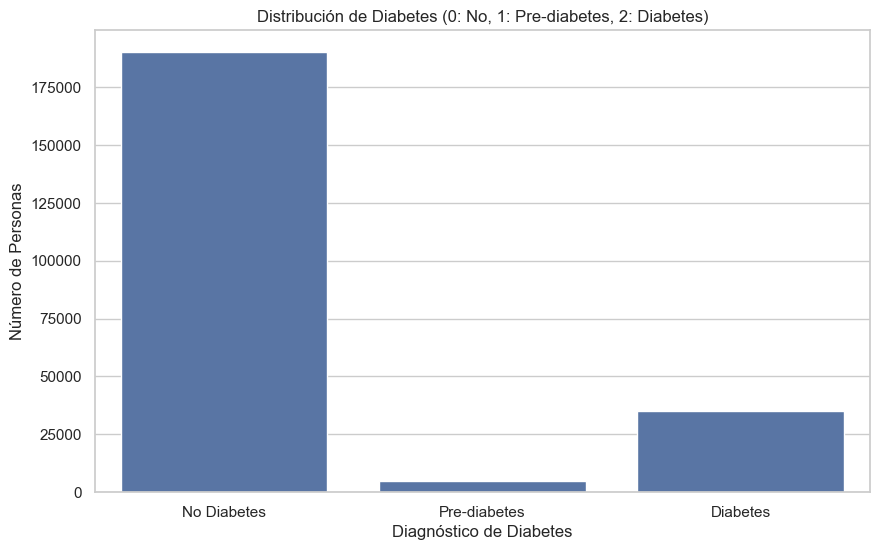

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Diabetes_012')
plt.title("Distribución de Diabetes (0: No, 1: Pre-diabetes, 2: Diabetes)")
plt.xlabel("Diagnóstico de Diabetes")
plt.ylabel("Número de Personas")
plt.xticks([0, 1, 2], ['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.show()



# Boxplot de 'BMI' según 'Diabetes_012'

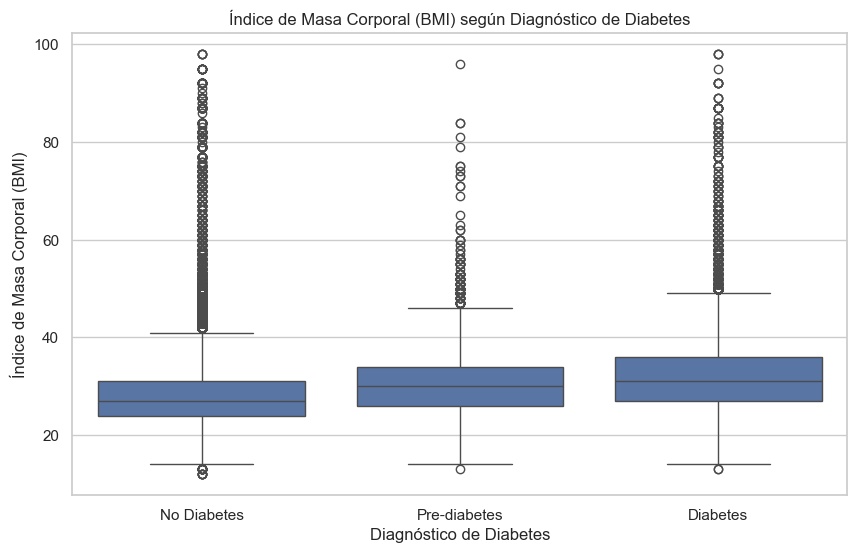

<Axes: xlabel='Diabetes_012', ylabel='BMI'>

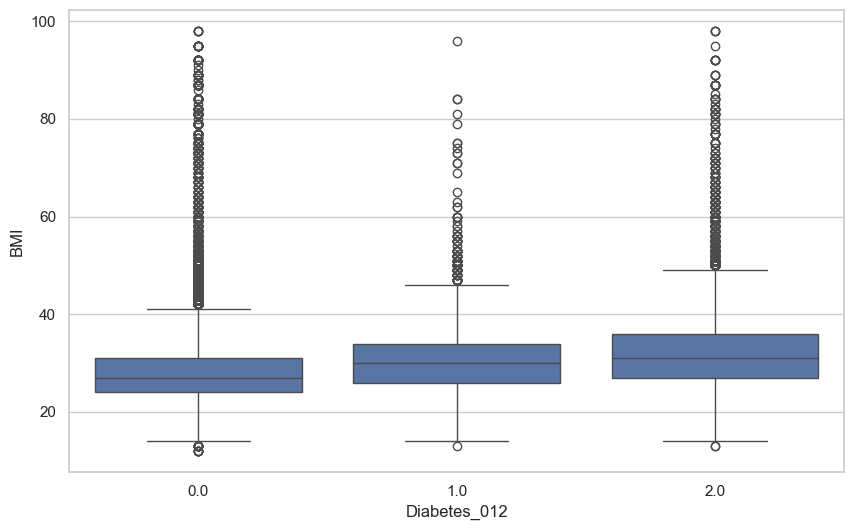

In [70]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Diabetes_012', y='BMI')
plt.title("Índice de Masa Corporal (BMI) según Diagnóstico de Diabetes")
plt.xlabel("Diagnóstico de Diabetes")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.xticks([0, 1, 2], ['No Diabetes', 'Pre-diabetes', 'Diabetes'])
plt.show()

# Boxplot de 'BMI' según 'Diabetes_012'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Diabetes_012', y='BMI')


# Gráfico de barras de IBM vs Frecuencia.



C:\Users\Ramses\AppData\Local\Temp\ipykernel_6604\1245476336.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_diabetes_count = df_diabetes.groupby(['BMI_Range', 'Diabetes_012']).size().reset_index(name='Count')


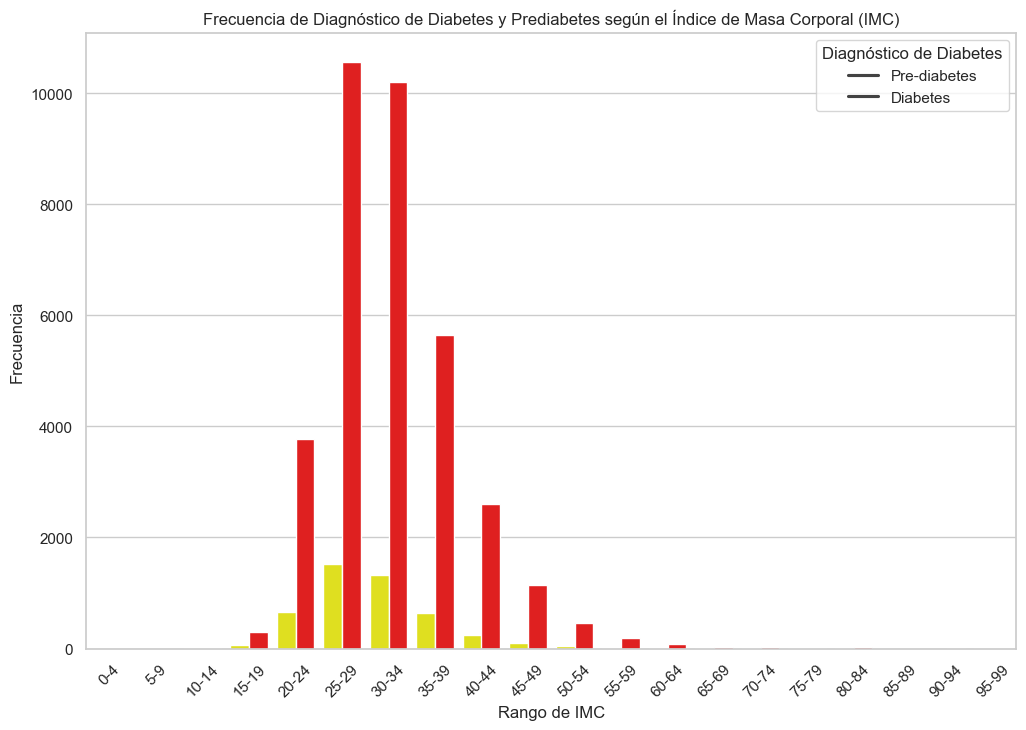

In [71]:
# Asegurarnos de que 'BMI' y 'Diabetes_012' existen en el dataframe
if 'BMI' not in df.columns or 'Diabetes_012' not in df.columns:
    raise ValueError("Las columnas 'BMI' y 'Diabetes_012' deben estar en el dataframe.")

# Eliminar filas con valores nulos en 'BMI' y 'Diabetes_012'
df = df.dropna(subset=['BMI', 'Diabetes_012'])

# Filtrar solo los registros con diabetes (2) o prediabetes (1)
df_diabetes = df[df['Diabetes_012'].isin([1, 2])]

# Filtrar valores de BMI válidos (mayores a 0)
df_diabetes = df_diabetes[df_diabetes['BMI'] > 0]

# Crear una nueva columna con los rangos de BMI (por ejemplo, intervalos de 5)
df_diabetes['BMI_Range'] = pd.cut(df_diabetes['BMI'], bins=range(0, int(df_diabetes['BMI'].max()) + 5, 5), right=False, labels=[f'{i}-{i+4}' for i in range(0, int(df_diabetes['BMI'].max()), 5)])

# Agrupar los datos por el rango de BMI y la presencia de diabetes
bmi_diabetes_count = df_diabetes.groupby(['BMI_Range', 'Diabetes_012']).size().reset_index(name='Count')

# Crear un diccionario de colores para cada categoría de diabetes
color_palette = {1: 'yellow', 2: 'red'}  # Pre-diabetes y Diabetes (sin incluir No Diabetes)

# Crear el gráfico de barras con los rangos de BMI y colores personalizados
plt.figure(figsize=(12, 8))
sns.barplot(data=bmi_diabetes_count, x='BMI_Range', y='Count', hue='Diabetes_012', palette=color_palette)

# Configurar las etiquetas
plt.title("Frecuencia de Diagnóstico de Diabetes y Prediabetes según el Índice de Masa Corporal (IMC)")
plt.xlabel("Rango de IMC")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.legend(title='Diagnóstico de Diabetes', labels=['Pre-diabetes', 'Diabetes'])
plt.show()



# Analisis de distribucion del IMC


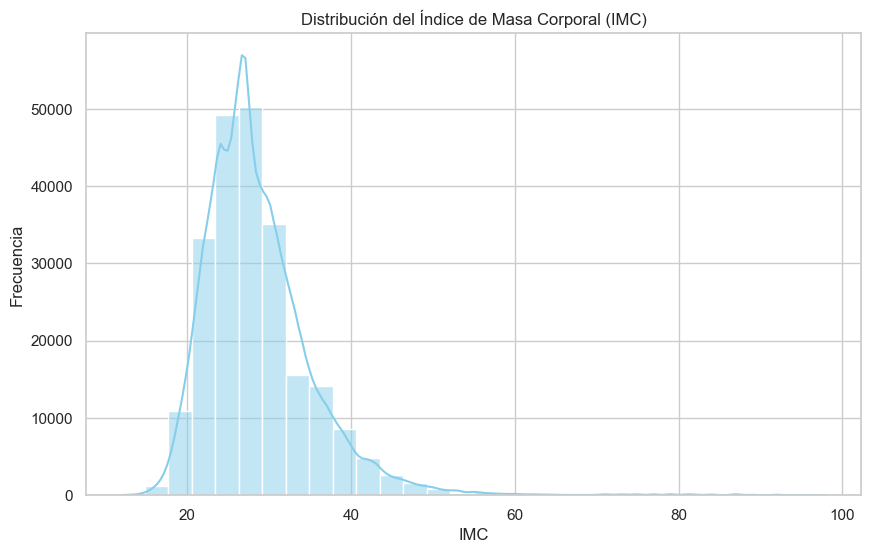

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True, color='skyblue', bins=30)
plt.title('Distribución del Índice de Masa Corporal (IMC)')
plt.xlabel('IMC')
plt.ylabel('Frecuencia')
plt.show()




# Analisis de la distribucion de Diabetes segun el genero


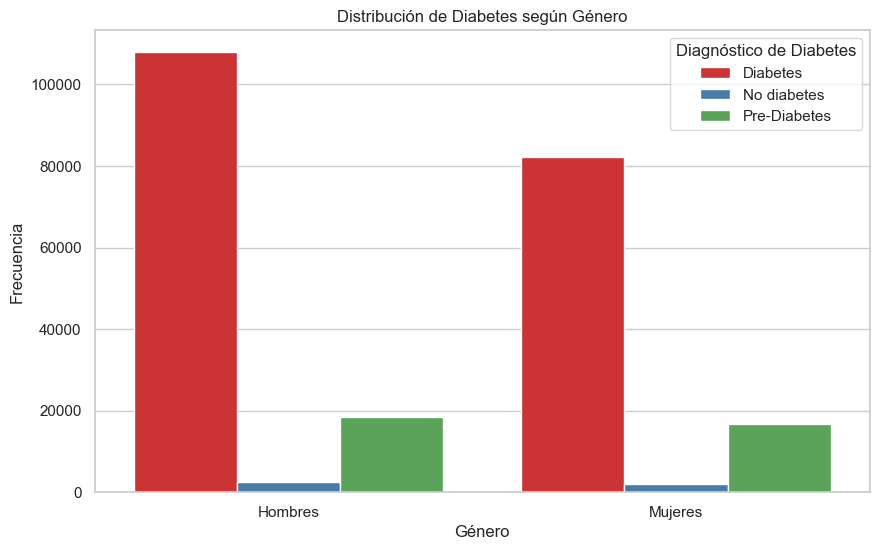

In [79]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Diabetes_012', palette='Set1')
plt.title('Distribución de Diabetes según Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks([0, 1,], ['Hombres', 'Mujeres'])
plt.legend(title='Diagnóstico de Diabetes', labels=['Diabetes', 'No diabetes', 'Pre-Diabetes'])
plt.show()

